# Assignment Question 1 Draft

To address the given task, we'll go through it step by step, writing R code for each part. The task involves analyzing BMI data for Dutch boys aged 10 to 11 years from the `dbbmi` dataset in the `gamlss.data` package, fitting parametric distributions, and selecting an appropriate one based on the analysis.

### 1. Plotting the Data

First, let's load the data, subset it for the specific age group, and plot the histogram to find a suitable value for `nbins`.


Attaching package: ‘gamlss.data’


The following object is masked from ‘package:datasets’:

    sleep


Loading required package: splines

Loading required package: gamlss.dist

Loading required package: nlme

Loading required package: parallel

 **********   GAMLSS Version 5.4-20  ********** 

For more on GAMLSS look at https://www.gamlss.com/

Type gamlssNews() to see new features/changes/bug fixes.




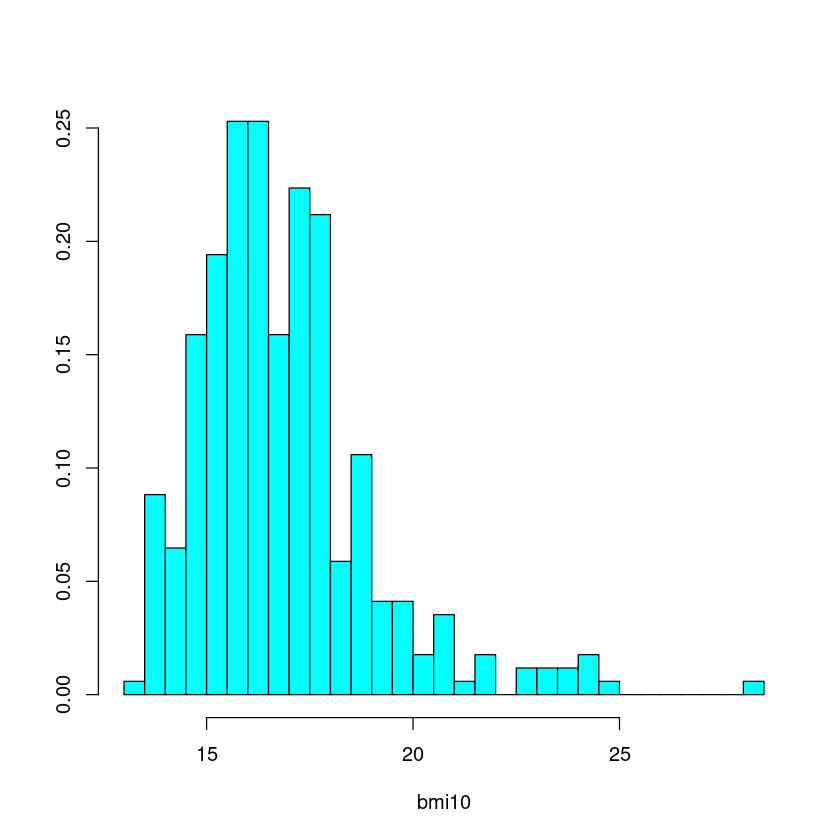

In [1]:
library(gamlss.data)
library(MASS)
library(gamlss)
library(ggplot2)

# Load the dataset
data(dbbmi)

# Subset for ages 10 to 11
old <- 10
da <- with(dbbmi, subset(dbbmi, age > old & age < old + 1))
bmi10 <- da$bmi

# Plot the histogram
truehist(bmi10, nbins=30) # Adjust nbins as needed to make the histogram look good

Experiment with the `nbins` parameter to find a visually appealing and informative histogram. The goal is to have enough bins to clearly see the distribution's shape without making it too noisy.

### 2. Fitting Parametric Distributions

Next, we'll fit several parametric distributions to the data. Common distributions for BMI data include the Normal, Log-Normal, and Gamma distributions, among others. The `gamlss` package provides functions to fit a wide range of distributions.

In [2]:
# Fit different distributions
fit_norm <- gamlss(bmi10 ~ 1, family=NO)
fit_lognorm <- gamlss(bmi10 ~ 1, family=LOGNO)
fit_gamma <- gamlss(bmi10 ~ 1, family=GA)

# Compare models
models <- list(fit_norm, fit_lognorm, fit_gamma)
aic_values <- sapply(models, AIC)
print(aic_values)

# Select the model with the lowest AIC
selected_model <- models[[which.min(aic_values)]]

GAMLSS-RS iteration 1: Global Deviance = 1484.827 
GAMLSS-RS iteration 2: Global Deviance = 1484.827 
GAMLSS-RS iteration 1: Global Deviance = 1433.15 
GAMLSS-RS iteration 2: Global Deviance = 1433.15 
GAMLSS-RS iteration 1: Global Deviance = 1448.24 
GAMLSS-RS iteration 2: Global Deviance = 1448.24 
[1] 1488.827 1437.150 1452.240


The choice of distribution can be justified by comparing the Akaike Information Criterion (AIC) values of the fitted models—the model with the lowest AIC is typically preferred as it suggests a good fit with relatively lower complexity.

### 3. Output Parameter Estimates and Interpretation

Finally, for the chosen model, we can output the parameter estimates and interpret them according to the distribution's characteristics.

In [3]:
# Output parameter estimates for the chosen model
summary(selected_model)

******************************************************************
Family:  c("LOGNO", "Log Normal") 

Call:  gamlss(formula = bmi10 ~ 1, family = LOGNO) 

Fitting method: RS() 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.816818   0.006457   436.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------------------------------
Sigma link function:  log
Sigma Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.12818    0.03835   -55.5   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------------------------------
No. of observations in the fit:  340 
Degrees of Freedom for the fit:  2
      Residual Deg. of Freedom:  338 
                      at cycle:  2 
 
Global Deviance:     1433.15 
  

Interpretation of the parameters will depend on the selected distribution. For example:
- For a Normal distribution (`NO`), the parameters are the mean (`mu`) and standard deviation (`sigma`), representing the location and scale of the distribution.
- For a Log-Normal distribution (`LOGNO`), `mu` and `sigma` represent the mean and standard deviation of the variable's logarithm, indicating the distribution's central tendency and spread on a log scale.
- For a Gamma distribution (`GA`), the parameters might include a shape and a scale parameter, reflecting the distribution's skewness and scale.

Refer to the GAMLSS book or documentation for specific interpretations of the parameters of your chosen distribution. The interpretation will help in understanding the characteristics of BMI distribution among Dutch boys aged 10 to 11, such as its central tendency, variability, and potential skewness.